In [6]:
import matplotlib.pyplot as plt
# import seaborn as sns
import numpy as np
import sklearn
# sns.set_style('darkgrid')
# import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import time
from pickle import load

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PowerTransformer
import math
from scipy.stats import multivariate_normal
from scipy.stats import norm
from statsmodels.tsa.stattools import acf

In [12]:
truth_acf_full = np.load("acf_data/truth_acf_full.npy")
poly_acf_full = np.load("acf_data/poly_acf_full.npy")
rnn_acf_full= np.load("acf_data/rnn_acf_full.npy")
gan_acf_full = np.load("acf_data/gan_acf_full.npy")

In [13]:
truth_acf_full_28 = np.load("acf_data/truth_acf_full_28.npy")
rnn_acf_full_28= np.load("acf_data/rnn_acf_full_28.npy")
gan_acf_full_28 = np.load("acf_data/gan_acf_full_28.npy")

In [14]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0],[0],color="#4daf4a",lw=3,label="Truth"),
                    Line2D([0],[0],color="#e41a1c",lw=2,label="Polynomial"),
                  Line2D([0],[0],color="#377eb8",lw=2,label="L96-RNN"),
                  Line2D([0],[0],color="#984ea3",lw=2,label="GAN")]

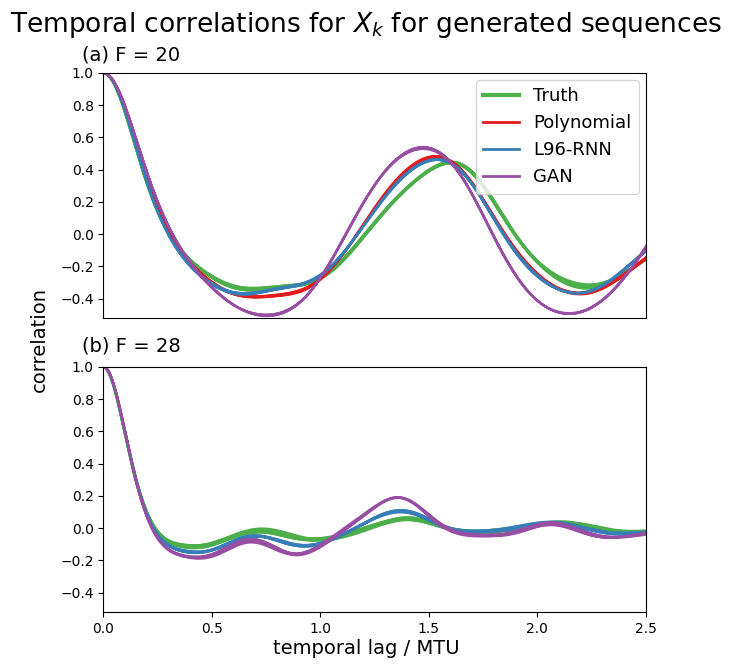

In [16]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(7,7))

fig.suptitle("Temporal correlations for $X_{k}$ for generated sequences",fontsize=19,y=0.97)

xaxis = np.linspace(0,5,1000)

for i in range(8):
    ax[0].plot(xaxis,truth_acf_full[i,:],color="#4daf4a",linewidth=2)
for i in range(8):
    ax[0].plot(xaxis,poly_acf_full[i,:],color="#e41a1c")
for i in range(8):
    ax[0].plot(xaxis,rnn_acf_full[i,:],color="#377eb8")
for i in range(8):
    ax[0].plot(xaxis,gan_acf_full[i,:],color="#984ea3")
    
    

for i in range(8):
    ax[1].plot(xaxis,truth_acf_full_28[i,:],color="#4daf4a",linewidth=2)
for i in range(8):
    ax[1].plot(xaxis,rnn_acf_full_28[i,:],color="#377eb8")
for i in range(8):
    ax[1].plot(xaxis,gan_acf_full_28[i,:],color="#984ea3")
    
fig.legend(handles=legend_elements,loc=(0.65,0.71),prop={"size":13})

for i in range(2):
    ax[i].set_xlim([0,2.5])
    ax[i].set_ylim([-0.52,1.0])
#     ax[i].set_ylim([0,0.082])


ax[0].text(-0.1,1.17,"(a) F = 20",fontsize=14,va="top")
ax[1].text(-0.1,1.19,"(b) F = 28",fontsize=14,va="top")

ax[0].set_xticks([])

fig.text(0.5, 0.05, 'temporal lag / MTU', ha='center',fontsize="14")
fig.text(0.02, 0.5, 'correlation', va='center', rotation='vertical',fontsize="14")

plt.savefig("temporal_correlation.pdf",bbox_inches="tight")

plt.show()


In [124]:
poly_acf_residual = np.load("acf_data/poly_acf_residual.npy")
rnn_acf_residual =np.load("acf_data/rnn_acf_residual.npy")

In [134]:
from matplotlib.lines import Line2D
legend_elements = [
                    Line2D([0],[0],color="#e41a1c",lw=2,label="Polynomial"),
                  Line2D([0],[0],color="#377eb8",lw=2,label="L96-RNN"),
                  ]

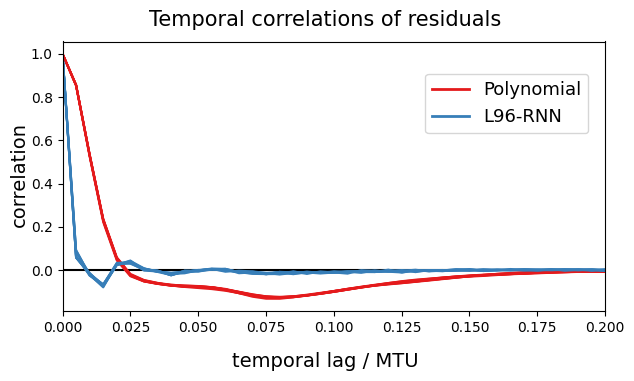

In [153]:
fig,ax = plt.subplots(figsize=(7,3.5))

fig.suptitle("Temporal correlations of residuals",fontsize=15,y=0.97)

xaxis = np.linspace(0,5,1000)

plt.plot(xaxis,xaxis*0,color="k")


for i in range(8):
    ax.plot(xaxis,poly_acf_residual[i,:],color="#e41a1c")
for i in range(8):
    ax.plot(xaxis,rnn_acf_residual[i,:],color="#377eb8")
    

    
fig.legend(handles=legend_elements,loc=(0.67,0.65),prop={"size":13})

ax.set_xlim([0,0.2])
#     ax[i].set_ylim([-0.52,1.0])
#     ax[i].set_ylim([0,0.082])


# ax[0].text(-0.1,1.17,"(a) F = 20",fontsize=14,va="top")
# ax[1].text(-0.1,1.19,"(b) F = 28",fontsize=14,va="top")


fig.text(0.5, -0.05, 'temporal lag / MTU', ha='center',fontsize="14")
fig.text(0.05, 0.5, 'correlation', va='center', rotation='vertical',fontsize="14")

plt.savefig("temporal_correlation_residuals.pdf",bbox_inches="tight")

plt.show()


In [3]:
truth_acf_full_u = np.load("acf_data/truth_acf_u.npy")
poly_acf_full_u = np.load("acf_data/poly_acf_u.npy")
gan_acf_full_u = np.load("acf_data/gan_acf_u.npy")
rnn_acf_full_u = np.load("acf_data/rnn_acf_u.npy")

truth_acf_full_u_28 = np.load("acf_data/truth_acf_u_28.npy")
gan_acf_full_u_28 = np.load("acf_data/gan_acf_u_28.npy")
rnn_acf_full_u_28 = np.load("acf_data/rnn_acf_u_28.npy")



In [4]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0],[0],color="#4daf4a",lw=3,label="Truth"),
                    Line2D([0],[0],color="#e41a1c",lw=2,label="Polynomial"),
                  Line2D([0],[0],color="#377eb8",lw=2,label="L96-RNN"),
                  Line2D([0],[0],color="#984ea3",lw=2,label="GAN")]

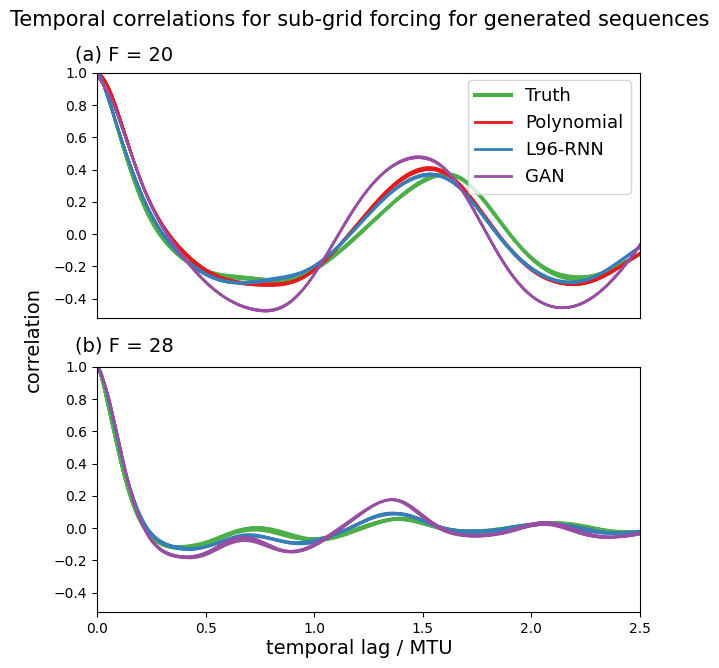

In [10]:
fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(7,7))

fig.suptitle("Temporal correlations for sub-grid forcing for generated sequences",fontsize=15,y=0.97)

xaxis = np.linspace(0,5,1000)

for i in range(8):
    ax[0].plot(xaxis,truth_acf_full_u[i,:],color="#4daf4a",linewidth=2)
for i in range(8):
    ax[0].plot(xaxis,poly_acf_full_u[i,:],color="#e41a1c")
for i in range(8):
    ax[0].plot(xaxis,rnn_acf_full_u[i,:],color="#377eb8")
for i in range(8):
    ax[0].plot(xaxis,gan_acf_full_u[i,:],color="#984ea3")
    
    

for i in range(8):
    ax[1].plot(xaxis,truth_acf_full_u_28[i,:],color="#4daf4a",linewidth=2)
for i in range(8):
    ax[1].plot(xaxis,rnn_acf_full_u_28[i,:],color="#377eb8")
for i in range(8):
    ax[1].plot(xaxis,gan_acf_full_u_28[i,:],color="#984ea3")
    
fig.legend(handles=legend_elements,loc=(0.65,0.71),prop={"size":13})

for i in range(2):
    ax[i].set_xlim([0,2.5])
    ax[i].set_ylim([-0.52,1.0])
#     ax[i].set_ylim([0,0.082])


ax[0].text(-0.1,1.17,"(a) F = 20",fontsize=14,va="top")
ax[1].text(-0.1,1.19,"(b) F = 28",fontsize=14,va="top")

ax[0].set_xticks([])

fig.text(0.5, 0.05, 'temporal lag / MTU', ha='center',fontsize="14")
fig.text(0.02, 0.5, 'correlation', va='center', rotation='vertical',fontsize="14")

plt.savefig("temporal_correlation_u.pdf",bbox_inches="tight")

plt.show()
